## Assignment 02. Logistic regression and kNN.

### Part 1. Small numpy workout (10%)

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Create a matrix named A with shape (10, 10) from ordered natural numbers from 0 to 100 (excluded)
# hint: np.arange(100).reshape((10, 10))

A = np.arange(100).reshape((10,10))

In [3]:
A

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [4]:
# Compute mean values of the matrix row-wise

average = np.mean(A, 1)
average
# YOUR CODE HERE

array([ 4.5, 14.5, 24.5, 34.5, 44.5, 54.5, 64.5, 74.5, 84.5, 94.5])

In [5]:
# Transpose matrix A

A_transpose = A.T
A_transpose

# YOUR CODE HERE

array([[ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90],
       [ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91],
       [ 2, 12, 22, 32, 42, 52, 62, 72, 82, 92],
       [ 3, 13, 23, 33, 43, 53, 63, 73, 83, 93],
       [ 4, 14, 24, 34, 44, 54, 64, 74, 84, 94],
       [ 5, 15, 25, 35, 45, 55, 65, 75, 85, 95],
       [ 6, 16, 26, 36, 46, 56, 66, 76, 86, 96],
       [ 7, 17, 27, 37, 47, 57, 67, 77, 87, 97],
       [ 8, 18, 28, 38, 48, 58, 68, 78, 88, 98],
       [ 9, 19, 29, 39, 49, 59, 69, 79, 89, 99]])

In [6]:
# Multiply matrix A and transposed A element-wise

matmul = np.multiply(A , A_transpose)
matmul

# YOUR CODE HERE

array([[   0,   10,   40,   90,  160,  250,  360,  490,  640,  810],
       [  10,  121,  252,  403,  574,  765,  976, 1207, 1458, 1729],
       [  40,  252,  484,  736, 1008, 1300, 1612, 1944, 2296, 2668],
       [  90,  403,  736, 1089, 1462, 1855, 2268, 2701, 3154, 3627],
       [ 160,  574, 1008, 1462, 1936, 2430, 2944, 3478, 4032, 4606],
       [ 250,  765, 1300, 1855, 2430, 3025, 3640, 4275, 4930, 5605],
       [ 360,  976, 1612, 2268, 2944, 3640, 4356, 5092, 5848, 6624],
       [ 490, 1207, 1944, 2701, 3478, 4275, 5092, 5929, 6786, 7663],
       [ 640, 1458, 2296, 3154, 4032, 4930, 5848, 6786, 7744, 8722],
       [ 810, 1729, 2668, 3627, 4606, 5605, 6624, 7663, 8722, 9801]])

In [7]:
# Compute matrix product of matrix A and itself and save the result into matrix B
# https://en.wikipedia.org/wiki/Matrix_multiplication
# or https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html

B = A @ A # YOUR CODE HERE
B

array([[ 2850,  2895,  2940,  2985,  3030,  3075,  3120,  3165,  3210,
         3255],
       [ 7350,  7495,  7640,  7785,  7930,  8075,  8220,  8365,  8510,
         8655],
       [11850, 12095, 12340, 12585, 12830, 13075, 13320, 13565, 13810,
        14055],
       [16350, 16695, 17040, 17385, 17730, 18075, 18420, 18765, 19110,
        19455],
       [20850, 21295, 21740, 22185, 22630, 23075, 23520, 23965, 24410,
        24855],
       [25350, 25895, 26440, 26985, 27530, 28075, 28620, 29165, 29710,
        30255],
       [29850, 30495, 31140, 31785, 32430, 33075, 33720, 34365, 35010,
        35655],
       [34350, 35095, 35840, 36585, 37330, 38075, 38820, 39565, 40310,
        41055],
       [38850, 39695, 40540, 41385, 42230, 43075, 43920, 44765, 45610,
        46455],
       [43350, 44295, 45240, 46185, 47130, 48075, 49020, 49965, 50910,
        51855]])

### Part 2. Classification with logistic regression and kNN.

Today we will work with [Forest data subset from UCI repository](http://archive.ics.uci.edu/ml/datasets/Covertype). The dataset has the following structure: 7 classes, 54 features (40 of which are binary). Description is available at the link above or in the file `covtype.info.txt`.

In [8]:
import pandas as pd

In [9]:
# If on colab, uncomment the following lines

# !wget https://raw.githubusercontent.com/neychev/harbour_ml2020/master/assignments/assignment0_02_Lin_class/forest_dataset.csv

In [10]:
all_data = pd.read_csv('forest_dataset.csv')

In [11]:
all_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
count,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,2960.645900,154.127600,13.98120,269.502800,45.596800,2358.805400,212.382200,223.886000,142.892300,1982.005000,...,0.092300,0.078300,0.002000,0.002900,0.000300,0.000500,0.024000,0.02130,0.012300,2.034100
std,276.101899,111.112044,7.44313,214.741609,57.607363,1564.814207,26.560675,19.443395,37.460182,1307.685368,...,0.289463,0.268657,0.044679,0.053776,0.017319,0.022356,0.153057,0.14439,0.110227,1.378016
min,1866.000000,0.000000,0.00000,0.000000,-147.000000,0.000000,70.000000,88.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000
25%,2819.000000,57.000000,9.00000,108.000000,6.000000,1106.750000,199.000000,213.000000,120.000000,1041.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000
50%,2996.000000,128.000000,13.00000,218.000000,29.000000,2008.000000,218.000000,227.000000,143.000000,1719.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,2.000000
75%,3162.000000,254.000000,18.00000,390.000000,68.000000,3330.250000,231.000000,238.000000,167.000000,2542.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,2.000000
max,3846.000000,359.000000,57.00000,1370.000000,573.000000,7023.000000,254.000000,254.000000,247.000000,7080.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,7.000000


Let's take last 20% of the dataset into the `delayed_data` variable and use it in the end for final models evaluation (it will be the "new" dataset). The rest of the data should be stored in variable `all_data`. Let's not shuffle the datasets today.

In [12]:
delayed_data = all_data[int(0.8 * len(all_data)):]
all_data = all_data[:int(0.8 * len(all_data))]

Let's place the target values (class labels) into the variable `labels`, the design matrix into the variable `feature_matrix`. The dataset we are working with is fully numeric doesn't have any missing values, so we can work with `numpy`-formatted data. Let's get it using the `.values` method.

In [146]:
labels = all_data[all_data.columns[-1]].values
feature_matrix = all_data[all_data.columns[:-1]].values

delayed_labels = delayed_data[delayed_data.columns[-1]].values
delayed_feature_matrix = delayed_data[delayed_data.columns[:-1]].values

#### 2.1 Binary classification (10%)

We start with the binary classification problem. Train a linear classifier (`LogisticRegression`) to separate two classes. Split the available data (`all_data`) into train and test parts using `train_test_split` with default parameters.

In [14]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [15]:
two_class_labels_indices = (labels == 1) + (labels == 2)

two_class_feature_matrix = feature_matrix[two_class_labels_indices]
two_class_labels = labels[two_class_labels_indices]

In [16]:
train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(two_class_feature_matrix, two_class_labels) #<your_code_here>

Train the classifier. Estimate the quality of the trained model on the test set (`test_feature_matrix`) using `accuracy` score and `f1_score`([Wikipedia](https://en.wikipedia.org/wiki/F1_score)).

In [17]:
two_class_feature_matrix.shape

(6856, 54)

In [18]:
print(test_feature_matrix.shape)
print(test_labels.shape)

(1714, 54)
(1714,)


In [19]:
lr_clf = LogisticRegression()

In [20]:
lr_clf.fit(train_feature_matrix , train_labels)

y_pred = lr_clf.predict(test_feature_matrix)

accuracy_as = accuracy_score(test_labels , y_pred)
accuracy_f1 = f1_score(test_labels, y_pred, average='weighted')

print('accuracy_score:',accuracy_as ,'\tf1_score:',accuracy_f1)
# YOUR CODE HERE

accuracy_score: 0.7683780630105017 	f1_score: 0.7673761460418659



Now build the ROC curve and compute the ROC-AUC for this binary classification problem.

In [21]:
from sklearn.metrics import roc_curve, roc_auc_score

In [22]:
y_score = lr_clf.predict_proba(test_feature_matrix)[:,1]

fpr, tpr, threshold = roc_curve(test_labels, 
                                y_score, 
                                pos_label=2)

roc_auc_score_macro = roc_auc_score(test_labels,y_score,average='macro')
roc_auc_score_micro = roc_auc_score(test_labels,y_score,average='micro')

print(roc_auc_score_macro, roc_auc_score_micro)
# YOUR CODE HERE

0.822780457545736 0.822780457545736


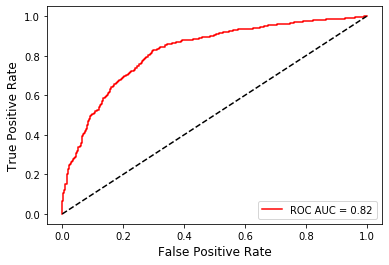

In [23]:
import matplotlib.pyplot as plt

plt.plot(fpr,
         tpr,
         'red',
         label =  "ROC AUC = %0.2f" % roc_auc_score_macro)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate', fontsize = 12)
plt.ylabel('True Positive Rate', fontsize = 12)
plt.show()

#### 2.2 Multi-class Classification: Logistic Regression (40%)

**Note:**

*Logistic regression may be used to solve N-class classification tasks. ``LogisticRegression`` class allows to do it in two ways:* 
- *1. Standard One vs. Rest (each class is separated from other N-1 classes). Set ``LogisticRegression`` class parameter `multi_class='ovr'`.*
- *2. Using cross-entropy function (model output is a vector of probability estimates for each class). ``LogisticRegression`` class parameter `multi_class='multinomial'`.*

*Let's use second option as default.*


Let's now use all the 7 available covertypes. Necessary data is stored in variables `feature_matrix` и `labels` if you didn't overwrite them. Split your dataset into training and testing parts using `train_test_split` function using the following parameters: `test_size=0.2`, `random_state=42`. Fit logistic regression to the training set. 

In [24]:
lr_clf = LogisticRegression(
                            solver='saga',
                            verbose = 1, 
                            multi_class = 'multinomial'
                            )

train_matrix, test_matrix, train_label, test_label = train_test_split(                                                                              feature_matrix,                                                                            labels,
                                                         test_size = .2,
                                                         random_state = 42
                                                                        )
lr_clf.fit(
            train_matrix, 
            train_label
          )
# YOUR CODE HERE

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
max_iter reached after 2 seconds
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=1,
                   warm_start=False)

Using 5-fold cross-validation (`GridSearchCV`) select optimal values for `C` and `penalty`. A range of values `np.logspace(-5, 5, 11)` should be used for `C` and a list of two options `['l1', 'l2']` - for `penalty`. Use accuracy to estimate the cross-validaiton performance: `scoring = 'accuracy'`.

In [25]:
from sklearn.model_selection import GridSearchCV

parameters = {
                'C' : np.logspace(-5, 5, 11),
                'penalty':['l1','l2']
             }
cv = 5
grid_search = GridSearchCV(
                            LogisticRegression( 
                                                solver='saga',
                                                multi_class = 'multinomial'),
                            param_grid = parameters,
                            scoring = 'accuracy',
                            cv = cv, 
                            return_train_score = True,
                            n_jobs = -3,
                            verbose=3).fit(train_matrix, train_label)

# YOUR CODE HERE

Fitting 5 folds for each of 22 candidates, totalling 110 fits
[Parallel(n_jobs=-3)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-3)]: Done  28 tasks      | elapsed:   29.3s
[Parallel(n_jobs=-3)]: Done 110 out of 110 | elapsed:  2.1min finished


In [26]:
grid_search.cv_results_

{'mean_fit_time': array([0.42867398, 2.35369658, 3.12172594, 2.02355294, 2.27479339,
        1.77928329, 2.32715855, 1.78012619, 2.61976366, 1.75346451,
        2.61563168, 2.12378588, 3.97736874, 1.75318666, 2.76166096,
        1.75058565, 2.79148641, 1.74528885, 2.79316306, 1.77267656,
        3.52184224, 1.99354272]),
 'std_fit_time': array([0.05073419, 0.3216531 , 0.2727812 , 0.33877435, 0.01861664,
        0.03328959, 0.03971469, 0.04980726, 0.19873395, 0.03926619,
        0.02371147, 0.42921525, 0.59965643, 0.03470652, 0.03987172,
        0.0118564 , 0.01425337, 0.03248646, 0.04475529, 0.05054633,
        0.82451337, 0.1987352 ]),
 'mean_score_time': array([0.00122728, 0.00105186, 0.00120692, 0.00109   , 0.00109491,
        0.00092573, 0.00175042, 0.00099282, 0.00103717, 0.00106826,
        0.00090232, 0.00099707, 0.00105143, 0.00108333, 0.0010726 ,
        0.00134516, 0.0010138 , 0.00095654, 0.0008667 , 0.00114803,
        0.00100379, 0.00094008]),
 'std_score_time': array([0.00

In [27]:
sorted(grid_search.cv_results_)

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'mean_train_score',
 'param_C',
 'param_penalty',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split0_train_score',
 'split1_test_score',
 'split1_train_score',
 'split2_test_score',
 'split2_train_score',
 'split3_test_score',
 'split3_train_score',
 'split4_test_score',
 'split4_train_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score',
 'std_train_score']

In [28]:
grid_search_pred = grid_search.predict(test_matrix)

In [29]:
accuracy_grid_search = accuracy_score(test_label,grid_search_pred) #.62375

Plot average `accuracy` values for different types of regularization `l1` and `l2` depending on regularization coefficient `C`.

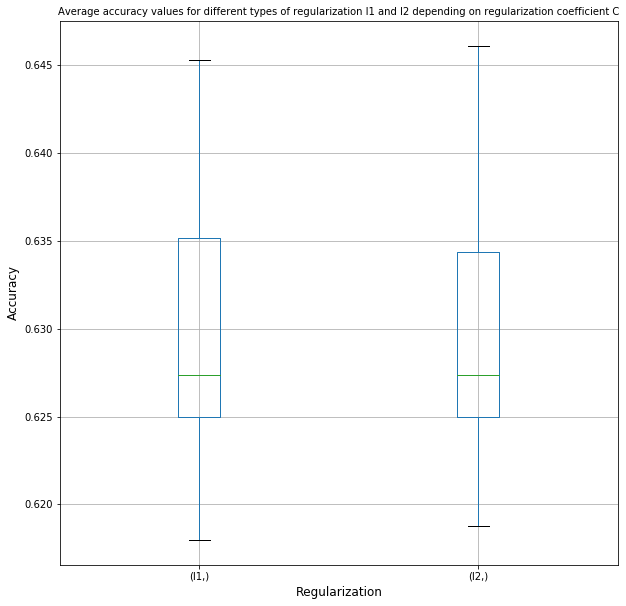

In [30]:
from sklearn.model_selection import cross_val_score #score evaluation

accuracy=[]
reg = ['l1', 'l2']

for i in reg:
    cv_result = cross_val_score(
                                LogisticRegression(
                                                    solver='saga',
                                                    multi_class='multinomial',
                                                    penalty=i) ,
                                train_matrix, 
                                train_label, 
                                cv = cv, 
                                scoring="accuracy")
    accuracy.append(cv_result)
plt.subplots(figsize=(10,10))
plt.xlabel('Regularization', fontsize = 12)
plt.ylabel('Accuracy', fontsize = 12)
plt.title('Average accuracy values for different types of regularization l1 and l2 depending on regularization coefficient C', fontsize = 10)
box=pd.DataFrame(accuracy,index=[reg])
box.T.boxplot()

Analyze the resulting plots. What values of `C` and `penalty` provide the best model performance?

In [31]:
grid_search.best_estimator_

# LogisticRegression( C=10000,
#                     penalty='l1') 
# YOUR CODE HERE

LogisticRegression(C=10000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

Using the optimal values for `C` and `penalty`, fit logistic regression to the training set and compute the class probabilities for the testing set (`best_lr_clf.predict_proba`).

In [47]:
best_lr_clf = grid_search.best_estimator_
best_lr_clf.fit(
                train_matrix,
                train_label
               )
best_lr_clf_pred = best_lr_clf.predict_proba(test_matrix)
# YOUR CODE HERE

Compute the average class probability values for testing set, using the results of the previous cell. Compare the resulting probability distribution to the class probability estimation, based of label frequency in the training set.

In [55]:
averages_pred = {}
for i in range(len(np.unique(test_label))):
    averages_pred[i] = sum(best_lr_clf_pred[:,i])/len(best_lr_clf_pred[:,i])

av_pred = averages_pred.values()
print('Prediction: ',*av_pred)

# YOUR CODE HERE

Prediction:  0.3775730052497746 0.48330060918155415 0.05475712701631599 0.004542128411990255 0.017304208637962983 0.02575822573011719 0.036764695772285166


You might use the ROC AUC for the multiclass as well (we recommend library `scikitplot`). Then the process will be that easy:
```
scikitplot.metrics.plot_roc(y_true, predicted_proba)
```

It's not mandatory, but we highly recommend to build the ROC curve for the multiclass classification as well.

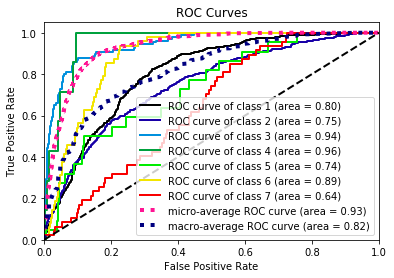

In [56]:
import scikitplot

scikitplot.metrics.plot_roc(test_label, best_lr_clf_pred)

# YOUR CODE HERE

#### 2.3 PCA preprocessing for the forest data (15%).
Now we will try to use PCA to decrease the dimentionality of the data. Fit PCA to the train part of the dataset and build the plot of the explaied variance varying the number of components.

_Hint: it might be a good idea to read about the data structure in the dataset info (link available above or in the file `covtype.info.txt`. Do not to normalize the data if the features scales are very different._

_Hint 2: it might be a good idea to apply PCA only to numerical features._

In [66]:
train_matrix_new = train_matrix[:,:10]

Explained variance:  [2.86505736e+06 1.28395689e+06 7.54513610e+04 3.79513592e+04
 1.30503481e+04 2.03123503e+03 1.05461175e+03 4.50985343e+02
 3.53010658e+01 3.21839939e+00]


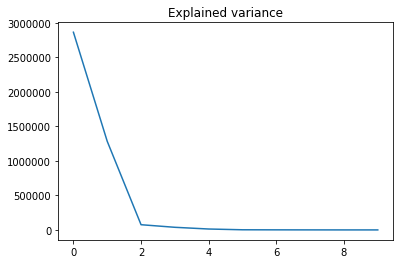

In [178]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

n_components = 10
pca = PCA(n_components = n_components)
pca.fit(train_matrix_new)

print('Explained variance: ',pca.explained_variance_)
plt.title('Explained variance')
plt.plot(pca.explained_variance_)

# YOUR CODE HERE

Now select the appropriate number of the components and try training the logistic regression on the transformed dataset. Will you use just default hyperparameters, the ones you have selected previously, or choose them once again?

In [157]:
n_feature_train = train_matrix_new[:,: 7]


best_lr_clf.fit(n_feature_train, train_label)
# YOUR CODE HERE

LogisticRegression(C=10000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

Finally, use `accuracy` score and `f1_score` to measure the quality of the aquired model.

In [161]:
print(
    accuracy_score(test_label, best_lr_clf.predict(test_matrix[:,:7])), #.595625
    f1_score(test_label, best_lr_clf.predict(test_matrix[:,:7]), average='weighted') #.5617
    )
# YOUR CODE HERE

0.595625 0.5617006239257506


#### 2.4 Multi-class Classification: kNN (15%).

Let's do a short recap of the course beginning. Fit `KNeighborsClassifier` implemented in `sklearn` to the training set mentioned above.

In [163]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf_1 = KNeighborsClassifier().fit(n_feature_train, train_label)
knn_clf_2 = KNeighborsClassifier(weights='distance').fit(n_feature_train, train_label)

# YOUR CODE HERE

Try using different weight functions, used in predictions: `[‘uniform’, ‘distance’]`. Select the one that you consider reasonable and explain your choice.

Use a grid from `1` to `10` for the `n_neighborsint` parameter. Plot the resulting KNN classifier `accuracy` depending on the number of neighbors.

[1 2 1 ... 2 1 2] [1 2 1 ... 2 1 2] [1 2 1 ... 2 1 2]


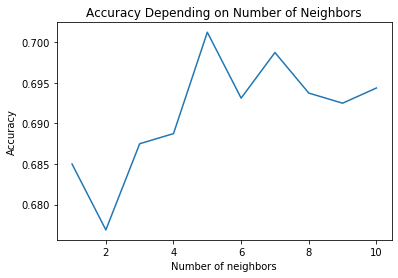

In [164]:
knn_pred_1 = knn_clf_1.predict(
                            test_matrix[:,:7]
                            )
knn_pred_2 = knn_clf_2.predict(
                            test_matrix[:,:7]
                            )
print(knn_pred_1, knn_pred_2, test_label)
# I'll chose weights=uniform because with uniform weights all points in each neighbourhood are weighted equally unlike weighted weights which add more value_importance_ to closer neighbors. Moreover, eyeballing the data, uniform weights is more accurate in this case.

accuracy = []
for i in range(1,11,1):
    accuracy.append(accuracy_score(
                        test_label, 
                        KNeighborsClassifier(n_neighbors=i)
                                                 .fit(n_feature_train, train_label)
                                                 .predict(test_matrix[:,:7])
                        )
                    )
fig, ax = plt.subplots(1,1)
ax.set_xlabel('Number of neighbors')
ax.set_ylabel('Accuracy')
ax.plot(range(1, 11), accuracy)
ax.set_title('Accuracy Depending on Number of Neighbors')

plt.show()
# YOUR CODE HERE

Using the optimal number of neighbors, compute class probabilities for the testing set (`.predict_proba`).

In [170]:
better_knn_clr = KNeighborsClassifier(n_neighbors = 5).fit(n_feature_train, train_label)
better_knn_clr_pred = better_knn_clr.predict_proba(test_matrix[:,:7])
# YOUR CODE HERE

Create `best_knn_clf`object, which represents the optimal classifier in terms of cross-validation `accuracy`.

In [171]:
# Hint: pass the weight function type and number of neighbors to the class constructor

best_knn_clf = KNeighborsClassifier(n_neighbors=5, weights='uniform').fit(train_matrix, train_label)

#### 2.5 Compare Logistic Regression and kNN (10%).

In real life new data becomes available and updates your dataset as the time comes. Compare the performance of your best logistic regression model `best_lr_clf` and the best kNN `best_knn_clf` using the delayed subset `delayed_data`. Which model shows the best performance?

In [172]:
delayed_labels = delayed_data[delayed_data.columns[-1]].values
delayed_matrix = delayed_data[delayed_data.columns[:-1]].values

In [175]:
print(np.unique(best_lr_clf.predict(delayed_matrix[:,:7])),
np.unique(best_knn_clf.predict(delayed_matrix)))
# delayed_data.shape
# train_matrix.shape
# YOUR CODE HERE

[1 2 3] [1 2 3 4 5 6 7]
